<a href="https://colab.research.google.com/github/justintai/DSTR_Assignemnt/blob/main/Lab_9_1_MLP_Classifier_Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

**Import required libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Reading data
import pandas as pd

from google.colab import files
# file = files.upload()
# import io
# data = pd.read_csv(io.BytesIO(file['Churn_Modelling.csv']))

path = '/content/drive/MyDrive/ODL/Lab 9 - ANN and DNN/Churn_Modelling.csv'
data = pd.read_csv(path)

'''data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()'''

"data = pd.read_csv('/content/Churn_Modelling.csv')\ndata.head()"

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Found 3617 zero balance values and it can be acceptable based on the type of the variable**

In [ ]:
data['Balance'].isin([0]).sum()

3617

In [ ]:
data.shape

(10000, 14)

**Visualisation of the dataset**

The coding below shows the visualisation of the dataset in order to understand the data more. It can be seen that every species of the Iris can be segregated into different regions to be predicted.

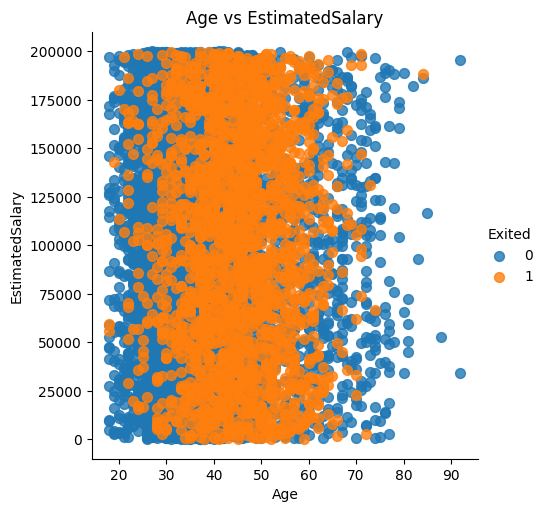

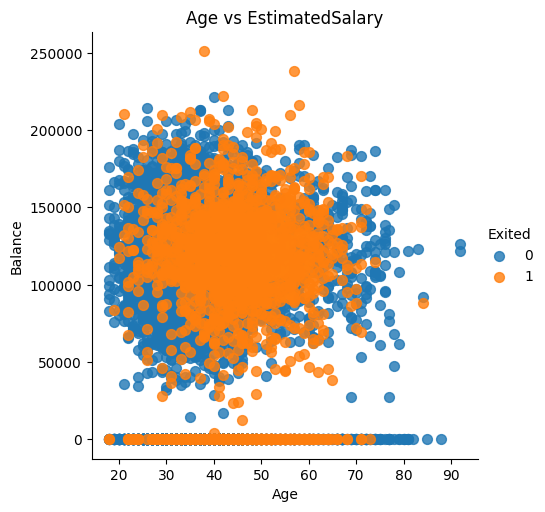

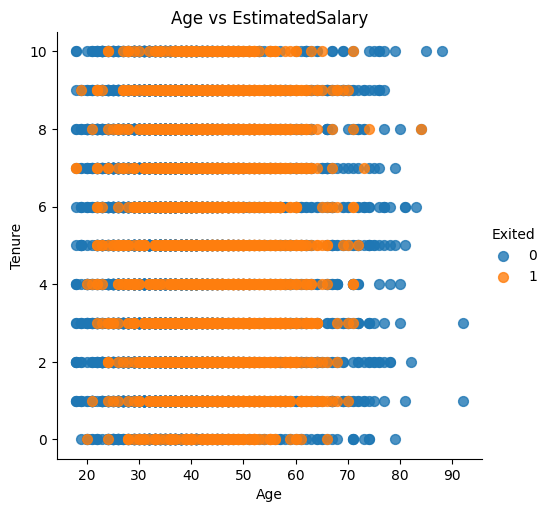

In [ ]:
sns.lmplot(x = 'Age', y = 'EstimatedSalary', data=data, fit_reg=False, hue="Exited", scatter_kws={"marker": "D", "s": 50})
plt.title('Age vs EstimatedSalary')

sns.lmplot(x = 'Age', y = 'Balance', data=data, fit_reg=False, hue="Exited", scatter_kws={"marker": "D", "s": 50})
plt.title('Age vs EstimatedSalary')

sns.lmplot(x = 'Age', y = 'Tenure', data=data, fit_reg=False, hue="Exited", scatter_kws={"marker": "D", "s": 50})
plt.title('Age vs EstimatedSalary')

plt.show()

0    7963
1    2037
Name: Exited, dtype: int64


<Axes: xlabel='Exited', ylabel='count'>

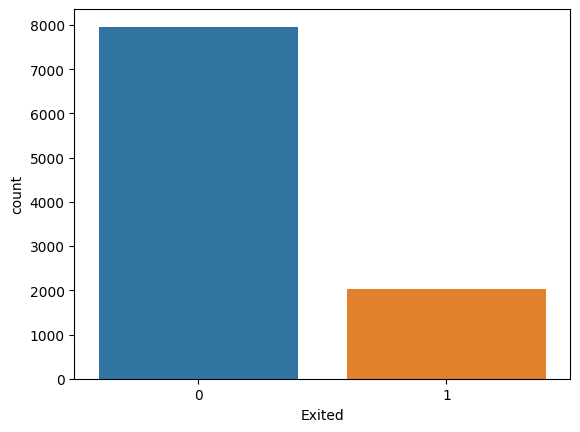

In [ ]:
print(data["Exited"].value_counts())
sns.countplot(x = 'Exited', data = data)

**Coding TV**

In [ ]:
data['Geography'] = pd.factorize(data['Geography'])[0]
data['Gender'] = pd.factorize(data['Gender'])[0]
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0


**Setting IV & TV**

In [ ]:
X = data.iloc[:, 3:13].values
y = data.iloc[:, 13].values

y

array([1, 0, 1, ..., 1, 1, 0])

**Normalization**

In [ ]:
X = normalize(X, axis=0)
print("Examples of X Normalised\n", X[:3])

Examples of X Normalised
 [[0.00941203 0.         0.         0.01041927 0.00345589 0.
  0.0061087  0.01190561 0.01393331 0.00877975]
 [0.00924477 0.00893962 0.         0.01017119 0.00172794 0.00849054
  0.0061087  0.         0.01393331 0.00974945]
 [0.00763302 0.         0.         0.01041927 0.01382355 0.01617517
  0.0183261  0.01190561 0.         0.00986978]]


In [ ]:
# Creating train,test and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print("Length of train set: ", X_train.shape, "y:", y_train.shape)
print("Length of test set: ", X_test.shape, "y:", y_test.shape)

Length of train set:  (8000, 10) y: (8000,)
Length of test set:  (2000, 10) y: (2000,)


### Neural network module

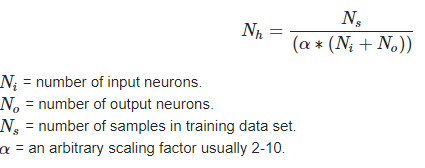

**MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
from numpy import arange
mlp = MLPClassifier()

mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

mlp_acc = accuracy_score(y_test, y_pred)
mlp_pre = precision_score(y_test, y_pred, average='micro')
mlp_recall = recall_score(y_test, y_pred, average='micro')
mlp_f1 = f1_score(y_test, y_pred, average='micro')

print("MLP - Accuracy: {:.3f}.".format(mlp_acc))
print("MLP - Precision: {:.3f}.".format(mlp_pre))
print("MLP - Recall: {:.3f}.".format(mlp_recall))
print("MLP - F1_Score: {:.3f}.".format(mlp_f1))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred))

MLP - Accuracy: 0.815.
MLP - Precision: 0.815.
MLP - Recall: 0.815.
MLP - F1_Score: 0.815.

Confusion Matrix: 
 [[1552   33]
 [ 337   78]]

 Clasification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      1585
           1       0.70      0.19      0.30       415

    accuracy                           0.81      2000
   macro avg       0.76      0.58      0.60      2000
weighted avg       0.80      0.81      0.77      2000



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

**MLP Classifier - 3 HL (DNN)**

In [ ]:
from sklearn.neural_network import MLPClassifier
from numpy import arange
mlp = MLPClassifier(hidden_layer_sizes=(300, 200, 100))

mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

mlp_acc = accuracy_score(y_test, y_pred)
mlp_pre = precision_score(y_test, y_pred, average='micro')
mlp_recall = recall_score(y_test, y_pred, average='micro')
mlp_f1 = f1_score(y_test, y_pred, average='micro')

print("MLP - Accuracy: {:.3f}.".format(mlp_acc))
print("MLP - Precision: {:.3f}.".format(mlp_pre))
print("MLP - Recall: {:.3f}.".format(mlp_recall))
print("MLP - F1_Score: {:.3f}.".format(mlp_f1))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred))

MLP - Accuracy: 0.834.
MLP - Precision: 0.834.
MLP - Recall: 0.834.
MLP - F1_Score: 0.834.

Confusion Matrix: 
 [[1552   33]
 [ 299  116]]

 Clasification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90      1585
           1       0.78      0.28      0.41       415

    accuracy                           0.83      2000
   macro avg       0.81      0.63      0.66      2000
weighted avg       0.83      0.83      0.80      2000



**MLP CLassifier with Random Search CV**

In [ ]:
from sklearn.neural_network import MLPClassifier
from numpy import arange
mlp = MLPClassifier(hidden_layer_sizes = (300, 200, 100))

parameters = {
    # 'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'random_state' : arange(0, 5, 1)
    }

mlp_r = RandomizedSearchCV(estimator = mlp, param_distributions = parameters, scoring = 'accuracy',
                              cv = 5, n_jobs = -1, verbose = 3, n_iter = 100)
mlp_r.fit(X_train, y_train)
best_parameters = mlp_r.best_params_
best_score = mlp_r.best_score_
print(best_parameters)
print()
print(best_score)

best_model = mlp_r.best_estimator_

y_pred = best_model.predict(X_test)

# Get the accuracy score
mlp_r_acc = accuracy_score(y_test, y_pred)
mlp_r_pre = precision_score(y_test, y_pred, average='micro')
mlp_r_recall = recall_score(y_test, y_pred, average='micro')
mlp_r_f1 = f1_score(y_test, y_pred, average='micro')

print("MLP - Accuracy: {:.3f}.".format(mlp_r_acc))
print("MLP - Precision: {:.3f}.".format(mlp_r_pre))
print("MLP - Recall: {:.3f}.".format(mlp_r_recall))
print("MLP - F1_Score: {:.3f}.".format(mlp_r_f1))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print ('\n Clasification Report:\n', classification_report(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'solver': 'adam', 'random_state': 2, 'learning_rate': 'constant', 'activation': 'relu'}

0.8474999999999999
MLP - Accuracy: 0.850.
MLP - Precision: 0.850.
MLP - Recall: 0.850.
MLP - F1_Score: 0.850.

Confusion Matrix: 
 [[1445  140]
 [ 160  255]]

 Clasification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      1585
           1       0.65      0.61      0.63       415

    accuracy                           0.85      2000
   macro avg       0.77      0.76      0.77      2000
weighted avg       0.85      0.85      0.85      2000



**Sklearn Tuner from Keras Tuner**

In [ ]:
pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 5.0 MB/s 


In [ ]:
from sklearn.neural_network import MLPClassifier
import keras_tuner as kt
from sklearn.model_selection import StratifiedKFold

def build_model(hp):
  model = MLPClassifier(hidden_layer_sizes = (300, 200, 100), max_iter = 10000,
      activation = hp.Choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
      solver = hp.Choice('solver', ['lbfgs', 'sgd', 'adam']),
      learning_rate = hp.Choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
      random_state = hp.Int('random_state', min_value = 0, max_value = 10, step = 1)
  )
  return model

tuner = kt.SklearnTuner(oracle = kt.oracles.BayesianOptimizationOracle(objective = kt.Objective('score', 'max'),
        max_trials = 3), hypermodel = build_model, cv = StratifiedKFold(5), overwrite = True)

tuner.search(X_train, y_train)

print()
best_model = tuner.get_best_models(num_models=1)[0]
best_model

Trial 3 Complete [00h 00m 40s]
score: 0.79725

Best score So Far: 0.79725
Total elapsed time: 00h 01m 52s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


MLPClassifier(activation='tanh', hidden_layer_sizes=(300, 200, 100),
              max_iter=10000, random_state=7, solver='sgd')

In [ ]:
best_model

MLPClassifier(activation='tanh', hidden_layer_sizes=(300, 200, 100),
              max_iter=10000, random_state=7, solver='sgd')

**Oversampling using SMOTE**

<Axes: xlabel='Churn', ylabel='count'>

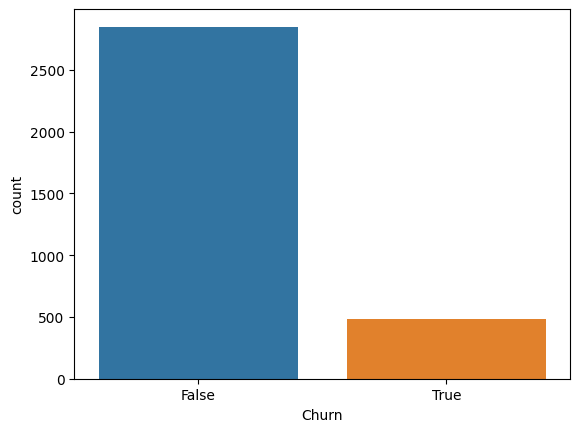

In [ ]:
path_1 = '/content/drive/MyDrive/ODL/Lab 2 - Data Exploration/telecom_churn.csv'
data_1 = pd.read_csv(path_1)

import seaborn as sns
sns.countplot(x = data_1['Churn'])

In [ ]:
data_1 = data_1.drop(['State', 'International plan', 'Voice mail plan'], axis = 1)

In [ ]:
x = data_1.drop('Churn', axis = 1)
y = data_1['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE
x_b, y_b = SMOTE().fit_resample(x, y)

<Axes: xlabel='Churn', ylabel='count'>

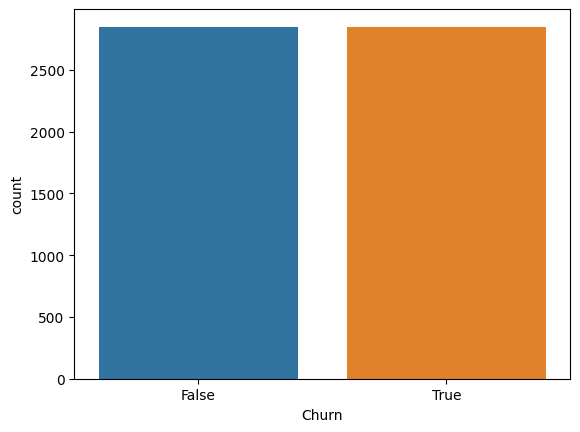

In [ ]:
sns.countplot(x = y_b)

**Undersampling using Near Miss**

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(x , y)

<Axes: xlabel='Churn', ylabel='count'>

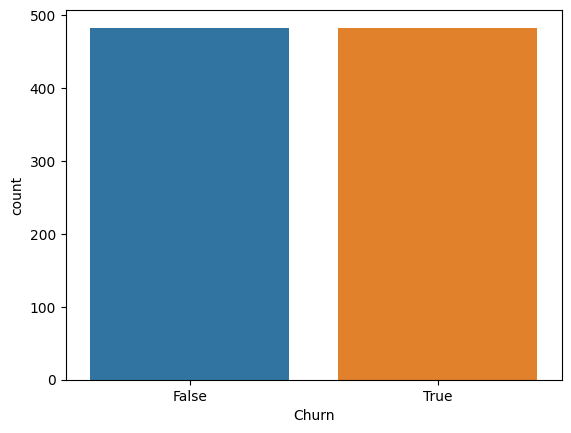

In [ ]:
sns.countplot(x = y_nm)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

**Import required libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Reading data
import pandas as pd

from google.colab import files
# file = files.upload()
# import io
# data = pd.read_csv(io.BytesIO(file['Churn_Modelling.csv']))

path = '/content/drive/MyDrive/ODL/Lab 9 - ANN and DNN/Churn_Modelling.csv'
data = pd.read_csv(path)

'''data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()'''

"data = pd.read_csv('/content/Churn_Modelling.csv')\ndata.head()"

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Found 3617 zero balance values and it can be acceptable based on the type of the variable**

In [ ]:
data['Balance'].isin([0]).sum()

3617

In [ ]:
data.shape

(10000, 14)

**Visualisation of the dataset**

The coding below shows the visualisation of the dataset in order to understand the data more. It can be seen that every species of the Iris can be segregated into different regions to be predicted.

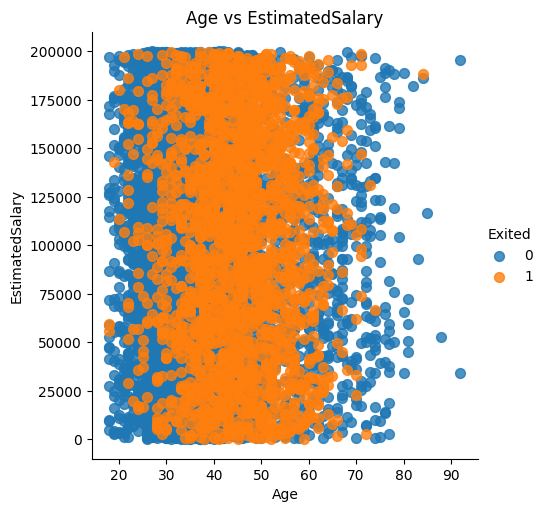

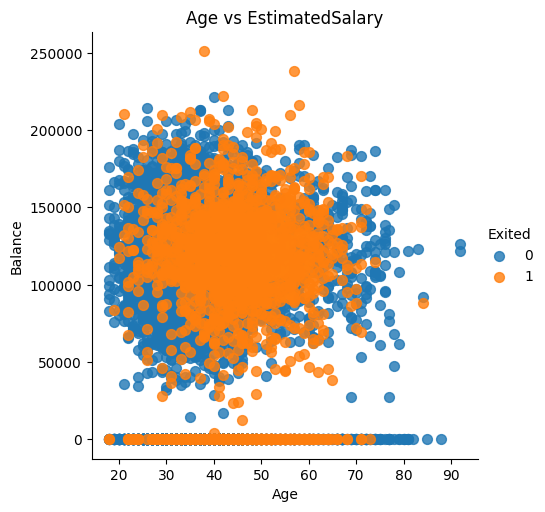

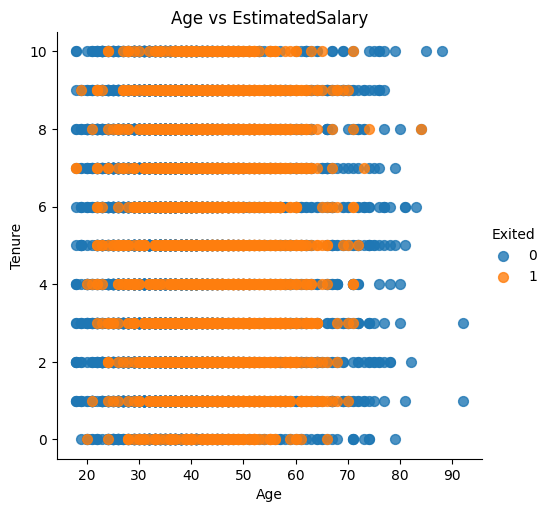

In [ ]:
sns.lmplot(x = 'Age', y = 'EstimatedSalary', data=data, fit_reg=False, hue="Exited", scatter_kws={"marker": "D", "s": 50})
plt.title('Age vs EstimatedSalary')

sns.lmplot(x = 'Age', y = 'Balance', data=data, fit_reg=False, hue="Exited", scatter_kws={"marker": "D", "s": 50})
plt.title('Age vs EstimatedSalary')

sns.lmplot(x = 'Age', y = 'Tenure', data=data, fit_reg=False, hue="Exited", scatter_kws={"marker": "D", "s": 50})
plt.title('Age vs EstimatedSalary')

plt.show()

0    7963
1    2037
Name: Exited, dtype: int64


<Axes: xlabel='Exited', ylabel='count'>

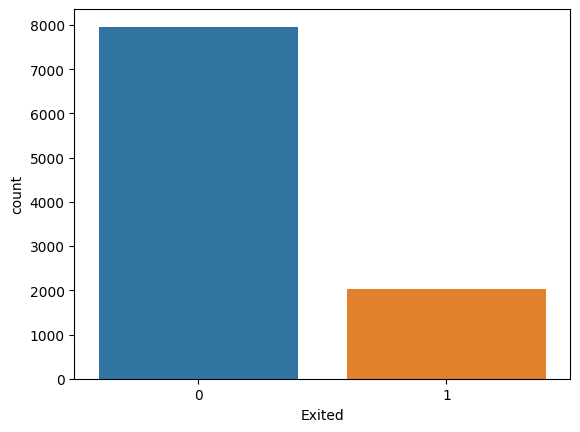

In [ ]:
print(data["Exited"].value_counts())
sns.countplot(x = 'Exited', data = data)

**Coding TV**

In [ ]:
data['Geography'] = pd.factorize(data['Geography'])[0]
data['Gender'] = pd.factorize(data['Gender'])[0]
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0


**Setting IV & TV**

In [ ]:
X = data.iloc[:, 3:13].values
y = data.iloc[:, 13].values

y

array([1, 0, 1, ..., 1, 1, 0])

**Normalization**

In [ ]:
X = normalize(X, axis=0)
print("Examples of X Normalised\n", X[:3])

Examples of X Normalised
 [[0.00941203 0.         0.         0.01041927 0.00345589 0.
  0.0061087  0.01190561 0.01393331 0.00877975]
 [0.00924477 0.00893962 0.         0.01017119 0.00172794 0.00849054
  0.0061087  0.         0.01393331 0.00974945]
 [0.00763302 0.         0.         0.01041927 0.01382355 0.01617517
  0.0183261  0.01190561 0.         0.00986978]]


In [ ]:
# Creating train,test and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print("Length of train set: ", X_train.shape, "y:", y_train.shape)
print("Length of test set: ", X_test.shape, "y:", y_test.shape)

Length of train set:  (8000, 10) y: (8000,)
Length of test set:  (2000, 10) y: (2000,)


### Neural network module

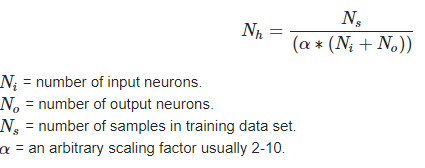

**MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
from numpy import arange
mlp = MLPClassifier()

mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

mlp_acc = accuracy_score(y_test, y_pred)
mlp_pre = precision_score(y_test, y_pred, average='micro')
mlp_recall = recall_score(y_test, y_pred, average='micro')
mlp_f1 = f1_score(y_test, y_pred, average='micro')

print("MLP - Accuracy: {:.3f}.".format(mlp_acc))
print("MLP - Precision: {:.3f}.".format(mlp_pre))
print("MLP - Recall: {:.3f}.".format(mlp_recall))
print("MLP - F1_Score: {:.3f}.".format(mlp_f1))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred))

MLP - Accuracy: 0.815.
MLP - Precision: 0.815.
MLP - Recall: 0.815.
MLP - F1_Score: 0.815.

Confusion Matrix: 
 [[1555   30]
 [ 341   74]]

 Clasification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      1585
           1       0.71      0.18      0.29       415

    accuracy                           0.81      2000
   macro avg       0.77      0.58      0.59      2000
weighted avg       0.80      0.81      0.77      2000



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

**MLP Classifier - 3 HL (DNN)**

In [ ]:
from sklearn.neural_network import MLPClassifier
from numpy import arange
mlp = MLPClassifier(hidden_layer_sizes=(300, 200, 100))

mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

mlp_acc = accuracy_score(y_test, y_pred)
mlp_pre = precision_score(y_test, y_pred, average='micro')
mlp_recall = recall_score(y_test, y_pred, average='micro')
mlp_f1 = f1_score(y_test, y_pred, average='micro')

print("MLP - Accuracy: {:.3f}.".format(mlp_acc))
print("MLP - Precision: {:.3f}.".format(mlp_pre))
print("MLP - Recall: {:.3f}.".format(mlp_recall))
print("MLP - F1_Score: {:.3f}.".format(mlp_f1))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred))

MLP - Accuracy: 0.863.
MLP - Precision: 0.863.
MLP - Recall: 0.863.
MLP - F1_Score: 0.863.

Confusion Matrix: 
 [[1557   28]
 [ 247  168]]

 Clasification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1585
           1       0.86      0.40      0.55       415

    accuracy                           0.86      2000
   macro avg       0.86      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



**MLP CLassifier with Random Search CV**

In [ ]:
from sklearn.neural_network import MLPClassifier
from numpy import arange
mlp = MLPClassifier(hidden_layer_sizes = (300, 200, 100))

parameters = {
    # 'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'random_state' : arange(0, 5, 1)
    }

mlp_r = RandomizedSearchCV(estimator = mlp, param_distributions = parameters, scoring = 'accuracy',
                              cv = 5, n_jobs = -1, verbose = 3, n_iter = 100)
mlp_r.fit(X_train, y_train)
best_parameters = mlp_r.best_params_
best_score = mlp_r.best_score_
print(best_parameters)
print()
print(best_score)

best_model = mlp_r.best_estimator_

y_pred = best_model.predict(X_test)

# Get the accuracy score
mlp_r_acc = accuracy_score(y_test, y_pred)
mlp_r_pre = precision_score(y_test, y_pred, average='micro')
mlp_r_recall = recall_score(y_test, y_pred, average='micro')
mlp_r_f1 = f1_score(y_test, y_pred, average='micro')

print("MLP - Accuracy: {:.3f}.".format(mlp_r_acc))
print("MLP - Precision: {:.3f}.".format(mlp_r_pre))
print("MLP - Recall: {:.3f}.".format(mlp_r_recall))
print("MLP - F1_Score: {:.3f}.".format(mlp_r_f1))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print ('\n Clasification Report:\n', classification_report(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: ignored

**Sklearn Tuner from Keras Tuner**

In [ ]:
pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 5.0 MB/s 


In [ ]:
from sklearn.neural_network import MLPClassifier
import keras_tuner as kt
from sklearn.model_selection import StratifiedKFold

def build_model(hp):
  model = MLPClassifier(hidden_layer_sizes = (300, 200, 100), max_iter = 10000,
      activation = hp.Choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
      solver = hp.Choice('solver', ['lbfgs', 'sgd', 'adam']),
      learning_rate = hp.Choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
      random_state = hp.Int('random_state', min_value = 0, max_value = 10, step = 1)
  )
  return model

tuner = kt.SklearnTuner(oracle = kt.oracles.BayesianOptimizationOracle(objective = kt.Objective('score', 'max'),
        max_trials = 3), hypermodel = build_model, cv = StratifiedKFold(5), overwrite = True)

tuner.search(X_train, y_train)

print()
best_model = tuner.get_best_models(num_models=1)[0]
best_model

Trial 3 Complete [00h 00m 40s]
score: 0.79725

Best score So Far: 0.79725
Total elapsed time: 00h 01m 52s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


MLPClassifier(activation='tanh', hidden_layer_sizes=(300, 200, 100),
              max_iter=10000, random_state=7, solver='sgd')

In [ ]:
best_model

MLPClassifier(activation='tanh', hidden_layer_sizes=(300, 200, 100),
              max_iter=10000, random_state=7, solver='sgd')

**Oversampling using SMOTE**

<Axes: xlabel='Churn', ylabel='count'>

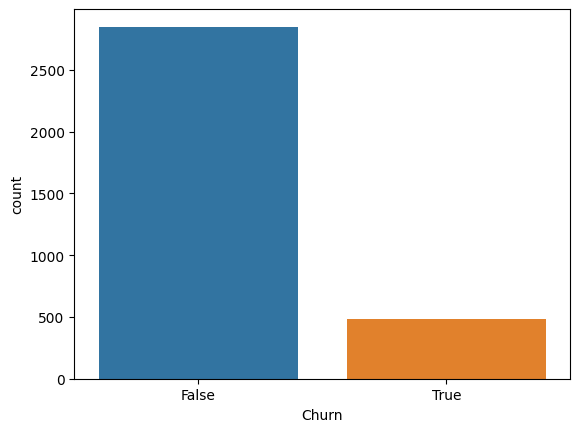

In [ ]:
path_1 = '/content/drive/MyDrive/ODL/Lab 2 - Data Exploration/telecom_churn.csv'
data_1 = pd.read_csv(path_1)

import seaborn as sns
sns.countplot(x = data_1['Churn'])

In [ ]:
data_1 = data_1.drop(['State', 'International plan', 'Voice mail plan'], axis = 1)

In [ ]:
x = data_1.drop('Churn', axis = 1)
y = data_1['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE
x_b, y_b = SMOTE().fit_resample(x, y)

<Axes: xlabel='Churn', ylabel='count'>

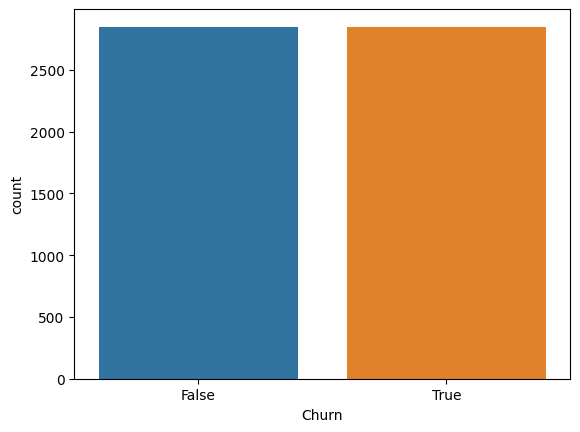

In [ ]:
sns.countplot(x = y_b)

**Undersampling using Near Miss**

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(x , y)

<Axes: xlabel='Churn', ylabel='count'>

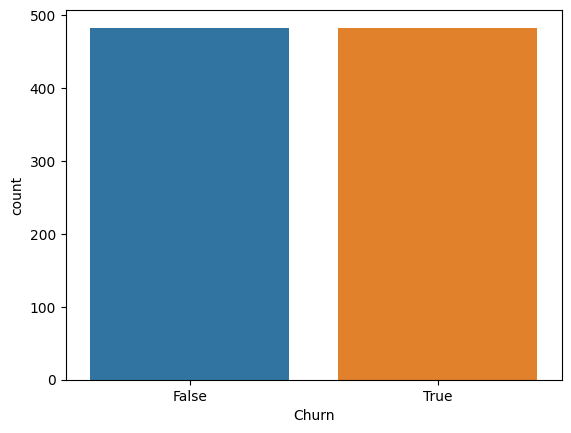

In [ ]:
sns.countplot(x = y_nm)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

**Import required libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Reading data
import pandas as pd

from google.colab import files
# file = files.upload()
# import io
# data = pd.read_csv(io.BytesIO(file['Churn_Modelling.csv']))

path = '/content/drive/MyDrive/ODL/Lab 9 - ANN and DNN/Churn_Modelling.csv'
data = pd.read_csv(path)

'''data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()'''

"data = pd.read_csv('/content/Churn_Modelling.csv')\ndata.head()"

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Found 3617 zero balance values and it can be acceptable based on the type of the variable**

In [ ]:
data['Balance'].isin([0]).sum()

3617

In [ ]:
data.shape

(10000, 14)

**Visualisation of the dataset**

The coding below shows the visualisation of the dataset in order to understand the data more. It can be seen that every species of the Iris can be segregated into different regions to be predicted.

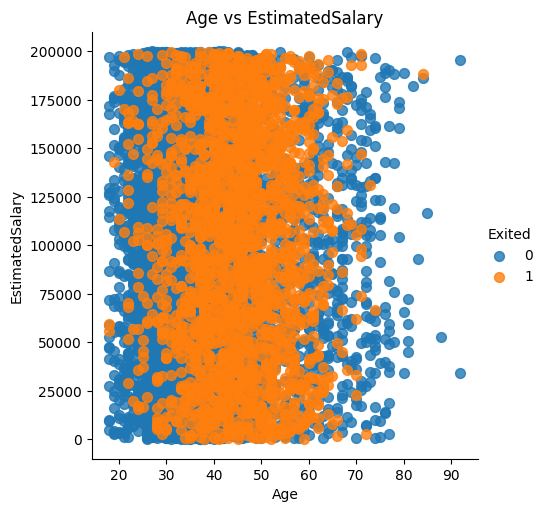

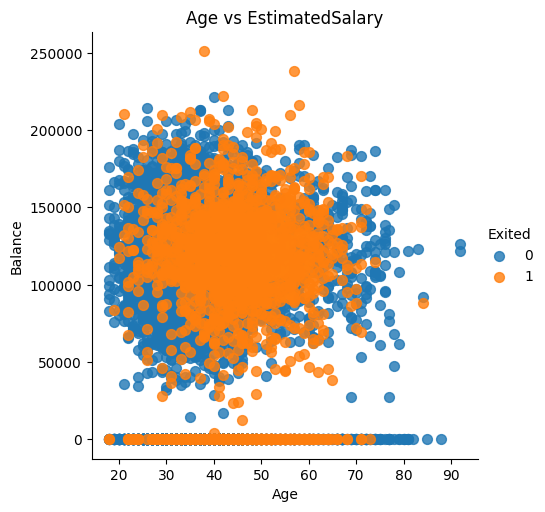

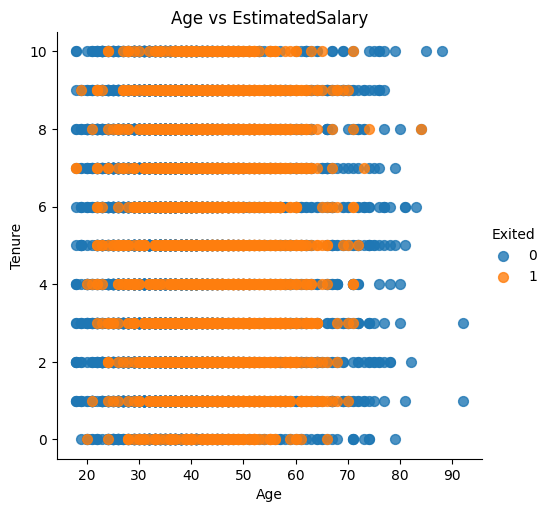

In [ ]:
sns.lmplot(x = 'Age', y = 'EstimatedSalary', data=data, fit_reg=False, hue="Exited", scatter_kws={"marker": "D", "s": 50})
plt.title('Age vs EstimatedSalary')

sns.lmplot(x = 'Age', y = 'Balance', data=data, fit_reg=False, hue="Exited", scatter_kws={"marker": "D", "s": 50})
plt.title('Age vs EstimatedSalary')

sns.lmplot(x = 'Age', y = 'Tenure', data=data, fit_reg=False, hue="Exited", scatter_kws={"marker": "D", "s": 50})
plt.title('Age vs EstimatedSalary')

plt.show()

0    7963
1    2037
Name: Exited, dtype: int64


<Axes: xlabel='Exited', ylabel='count'>

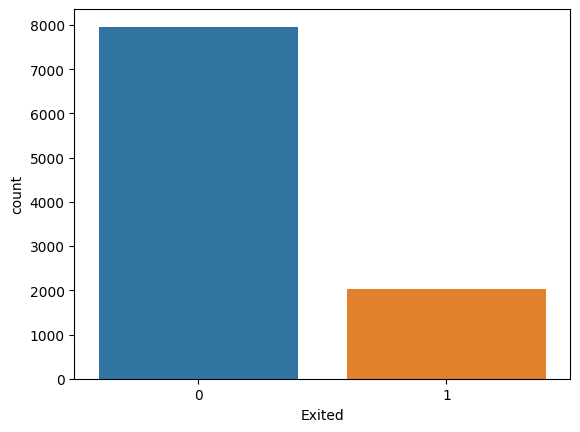

In [ ]:
print(data["Exited"].value_counts())
sns.countplot(x = 'Exited', data = data)

**Coding TV**

In [ ]:
data['Geography'] = pd.factorize(data['Geography'])[0]
data['Gender'] = pd.factorize(data['Gender'])[0]
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0


**Setting IV & TV**

In [ ]:
X = data.iloc[:, 3:13].values
y = data.iloc[:, 13].values

y

array([1, 0, 1, ..., 1, 1, 0])

**Normalization**

In [ ]:
X = normalize(X, axis=0)
print("Examples of X Normalised\n", X[:3])

Examples of X Normalised
 [[0.00941203 0.         0.         0.01041927 0.00345589 0.
  0.0061087  0.01190561 0.01393331 0.00877975]
 [0.00924477 0.00893962 0.         0.01017119 0.00172794 0.00849054
  0.0061087  0.         0.01393331 0.00974945]
 [0.00763302 0.         0.         0.01041927 0.01382355 0.01617517
  0.0183261  0.01190561 0.         0.00986978]]


In [ ]:
# Creating train,test and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print("Length of train set: ", X_train.shape, "y:", y_train.shape)
print("Length of test set: ", X_test.shape, "y:", y_test.shape)

Length of train set:  (8000, 10) y: (8000,)
Length of test set:  (2000, 10) y: (2000,)


### Neural network module

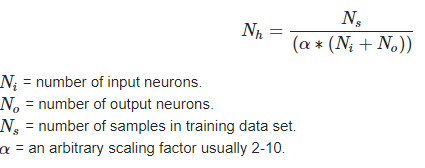

**MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
from numpy import arange
mlp = MLPClassifier()

mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

mlp_acc = accuracy_score(y_test, y_pred)
mlp_pre = precision_score(y_test, y_pred, average='micro')
mlp_recall = recall_score(y_test, y_pred, average='micro')
mlp_f1 = f1_score(y_test, y_pred, average='micro')

print("MLP - Accuracy: {:.3f}.".format(mlp_acc))
print("MLP - Precision: {:.3f}.".format(mlp_pre))
print("MLP - Recall: {:.3f}.".format(mlp_recall))
print("MLP - F1_Score: {:.3f}.".format(mlp_f1))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred))

MLP - Accuracy: 0.815.
MLP - Precision: 0.815.
MLP - Recall: 0.815.
MLP - F1_Score: 0.815.

Confusion Matrix: 
 [[1555   30]
 [ 341   74]]

 Clasification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      1585
           1       0.71      0.18      0.29       415

    accuracy                           0.81      2000
   macro avg       0.77      0.58      0.59      2000
weighted avg       0.80      0.81      0.77      2000



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

**MLP Classifier - 3 HL (DNN)**

In [ ]:
from sklearn.neural_network import MLPClassifier
from numpy import arange
mlp = MLPClassifier(hidden_layer_sizes=(300, 200, 100))

mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

mlp_acc = accuracy_score(y_test, y_pred)
mlp_pre = precision_score(y_test, y_pred, average='micro')
mlp_recall = recall_score(y_test, y_pred, average='micro')
mlp_f1 = f1_score(y_test, y_pred, average='micro')

print("MLP - Accuracy: {:.3f}.".format(mlp_acc))
print("MLP - Precision: {:.3f}.".format(mlp_pre))
print("MLP - Recall: {:.3f}.".format(mlp_recall))
print("MLP - F1_Score: {:.3f}.".format(mlp_f1))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred))

MLP - Accuracy: 0.863.
MLP - Precision: 0.863.
MLP - Recall: 0.863.
MLP - F1_Score: 0.863.

Confusion Matrix: 
 [[1557   28]
 [ 247  168]]

 Clasification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1585
           1       0.86      0.40      0.55       415

    accuracy                           0.86      2000
   macro avg       0.86      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



**MLP CLassifier with Random Search CV**

In [ ]:
from sklearn.neural_network import MLPClassifier
from numpy import arange
mlp = MLPClassifier(hidden_layer_sizes = (300, 200, 100))

parameters = {
    # 'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'random_state' : arange(0, 5, 1)
    }

mlp_r = RandomizedSearchCV(estimator = mlp, param_distributions = parameters, scoring = 'accuracy',
                              cv = 5, n_jobs = -1, verbose = 3, n_iter = 100)
mlp_r.fit(X_train, y_train)
best_parameters = mlp_r.best_params_
best_score = mlp_r.best_score_
print(best_parameters)
print()
print(best_score)

best_model = mlp_r.best_estimator_

y_pred = best_model.predict(X_test)

# Get the accuracy score
mlp_r_acc = accuracy_score(y_test, y_pred)
mlp_r_pre = precision_score(y_test, y_pred, average='micro')
mlp_r_recall = recall_score(y_test, y_pred, average='micro')
mlp_r_f1 = f1_score(y_test, y_pred, average='micro')

print("MLP - Accuracy: {:.3f}.".format(mlp_r_acc))
print("MLP - Precision: {:.3f}.".format(mlp_r_pre))
print("MLP - Recall: {:.3f}.".format(mlp_r_recall))
print("MLP - F1_Score: {:.3f}.".format(mlp_r_f1))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print ('\n Clasification Report:\n', classification_report(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: ignored

**Sklearn Tuner from Keras Tuner**

In [ ]:
pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 5.0 MB/s 


In [ ]:
from sklearn.neural_network import MLPClassifier
import keras_tuner as kt
from sklearn.model_selection import StratifiedKFold

def build_model(hp):
  model = MLPClassifier(hidden_layer_sizes = (300, 200, 100), max_iter = 10000,
      activation = hp.Choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
      solver = hp.Choice('solver', ['lbfgs', 'sgd', 'adam']),
      learning_rate = hp.Choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
      random_state = hp.Int('random_state', min_value = 0, max_value = 10, step = 1)
  )
  return model

tuner = kt.SklearnTuner(oracle = kt.oracles.BayesianOptimizationOracle(objective = kt.Objective('score', 'max'),
        max_trials = 3), hypermodel = build_model, cv = StratifiedKFold(5), overwrite = True)

tuner.search(X_train, y_train)

print()
best_model = tuner.get_best_models(num_models=1)[0]
best_model

Trial 3 Complete [00h 00m 40s]
score: 0.79725

Best score So Far: 0.79725
Total elapsed time: 00h 01m 52s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


MLPClassifier(activation='tanh', hidden_layer_sizes=(300, 200, 100),
              max_iter=10000, random_state=7, solver='sgd')

In [ ]:
best_model

MLPClassifier(activation='tanh', hidden_layer_sizes=(300, 200, 100),
              max_iter=10000, random_state=7, solver='sgd')

**Oversampling using SMOTE**

<Axes: xlabel='Churn', ylabel='count'>

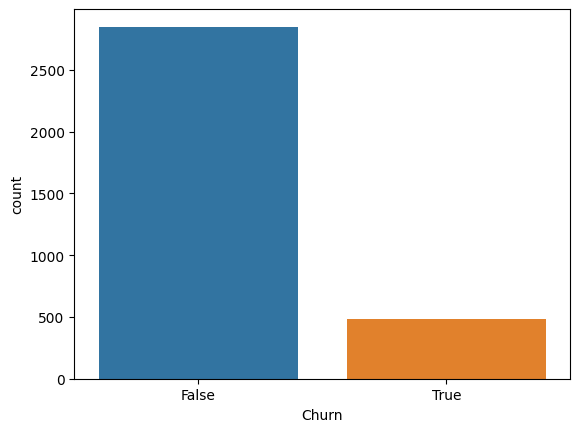

In [ ]:
path_1 = '/content/drive/MyDrive/ODL/Lab 2 - Data Exploration/telecom_churn.csv'
data_1 = pd.read_csv(path_1)

import seaborn as sns
sns.countplot(x = data_1['Churn'])

In [ ]:
data_1 = data_1.drop(['State', 'International plan', 'Voice mail plan'], axis = 1)

In [ ]:
x = data_1.drop('Churn', axis = 1)
y = data_1['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE
x_b, y_b = SMOTE().fit_resample(x, y)

<Axes: xlabel='Churn', ylabel='count'>

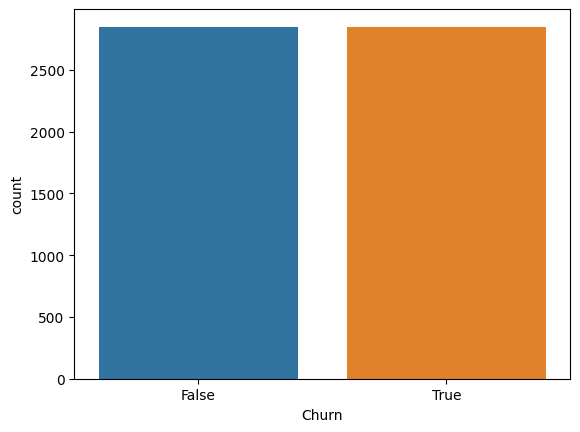

In [ ]:
sns.countplot(x = y_b)

**Undersampling using Near Miss**

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(x , y)

<Axes: xlabel='Churn', ylabel='count'>

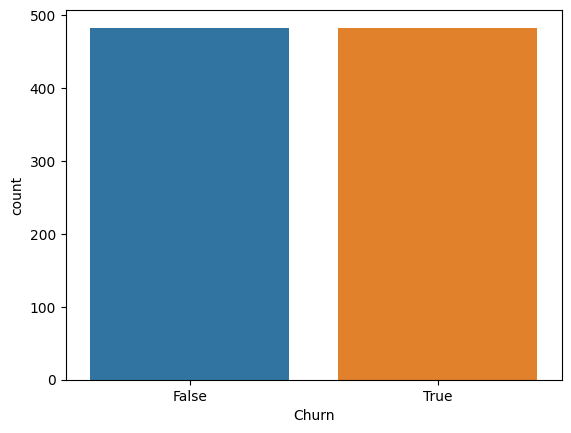

In [ ]:
sns.countplot(x = y_nm)